In [661]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [662]:
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
# tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')
# tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VEOEY CWST SRCL CWY.AX TMRAY SYM GXO AUTO.OL ZBRA KGX.DE CGNX DAIUF MANH BKW.SW ENLAY NEE IBDRY DNNGY FSLR ENR.DE')
tickers = yf.Tickers('ECL BMI VLTO XYL GF.SW WM GFL CLH VIE.PA CWST CWY.AX TOM.OL SYM GXO AUTO.OL ZBRA KGX.DE CGNX MANH BKW.SW ENEL.MI NEE IBE.MC ORSTED.CO FSLR ENR.DE')

In [663]:
# df = tickers.download(period="1y")
df = tickers.download(start="2020-01-01", end="2025-01-01", interval="1d")

[*********************100%***********************]  26 of 26 completed


In [664]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/ticker_download_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df.to_csv(filename, index=False)

In [665]:
# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:

    # Print ticker for debugging
    print(f"Processing {ticker}...")

    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    try:
        info = t.info
        # print(f"Sucessful fetching info for {ticker}: {info}")
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        continue
    
    # hist = t.history(period="2y")
    hist = t.history(start = '2020-01-01', end = '2025-01-01')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

Processing ECL...
Processing BMI...
Processing VLTO...
Processing XYL...
Processing GF.SW...
Processing WM...
Processing GFL...
Processing CLH...
Processing VIE.PA...
Processing CWST...
Processing CWY.AX...
Processing TOM.OL...
Processing SYM...
Processing GXO...
Processing AUTO.OL...
Processing ZBRA...
Processing KGX.DE...
Processing CGNX...
Processing MANH...
Processing BKW.SW...
Processing ENEL.MI...
Processing NEE...
Processing IBE.MC...
Processing ORSTED.CO...
Processing FSLR...
Processing ENR.DE...


In [666]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$65.33B,1.31M,29.99,N/A,29.989290
1,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.08B,0.16M,245.54,N/A,245.544249
2,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$21.61B,1.82M,31.56,N/A,31.555810
3,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$25.23B,1.22M,54.20,N/A,54.198801
4,GF.SW,GEORG FISCHER N,N/A,$4.41B,0.2M,54.79,N/A,54.790522
5,WM,"Waste Management, Inc.","Waste Management, Inc., through its subsidiari...",$88.74B,1.74M,91.93,N/A,91.932643
6,GFL,GFL Environmental Inc. Subordin,GFL Environmental Inc. provides non-hazardous ...,$16.16B,1.2M,167.84,N/A,167.844818
7,CLH,"Clean Harbors, Inc.","Clean Harbors, Inc. provides environmental and...",$10.04B,0.34M,170.69,N/A,170.689260
8,VIE.PA,VEOLIA ENVIRON.,Veolia Environnement SA designs and provides w...,$21.88B,1.85M,40.64,N/A,40.635377
9,CWST,"Casella Waste Systems, Inc.","Casella Waste Systems, Inc., together with its...",$6.59B,0.27M,130.22,N/A,130.221931


In [667]:
# Display the data
df

Price        Close                                                             \
Ticker     AUTO.OL      BKW.SW         BMI       CGNX         CLH        CWST   
Date                                                                            
2020-01-02     NaN         NaN   61.286892  53.598686   85.019997   45.959999   
2020-01-03     NaN   63.317280   61.277290  52.992729   85.279999   46.830002   
2020-01-06     NaN   63.673500   61.018242  52.311035   85.239998   47.689999   
2020-01-07     NaN   64.564049   60.835960  52.150074   84.230003   47.840000   
2020-01-08     NaN   65.454582   61.469177  52.585613   82.800003   47.400002   
...            ...         ...         ...        ...         ...         ...   
2024-12-24     NaN         NaN  219.640457  36.601562  230.940002  106.239998   
2024-12-26     NaN         NaN  219.590530  36.850960  231.330002  107.550003   
2024-12-27   11.36  151.699997  215.097885  35.953133  229.570007  106.160004   
2024-12-30   11.11  150.199997  213.899857  35.584023  230.160004  105.419998   
2024-12-31     NaN         NaN  211.773331  35.773567  230.139999  105.809998   

Price                                                  ...    Volume  \
Ticker        CWY.AX         ECL   ENEL.MI     ENR.DE  ...      MANH   
Date                                                   ...             
2020-01-02  1.815361  179.795837  5.145772        NaN  ...  284400.0   
2020-01-03  1.815361  178.935699  5.145059        NaN  ...  331200.0   
2020-01-06  1.833424  177.414062  5.155761        NaN  ...  402900.0   
2020-01-07  1.833424  177.187225  5.158616        NaN  ...  243100.0   
2020-01-08  1.842456  177.253387  5.187156        NaN  ...  306700.0   
...              ...         ...       ...        ...  ...       ...   
2024-12-24  2.650687  240.118759       NaN        NaN  ...  130300.0   
2024-12-26       NaN  238.742310       NaN        NaN  ...  276200.0   
2024-12-27  2.660578  237.146439  6.641284  50.080002  ...  482700.0   
2024-12-30  2.650687  233.914810  6.679112  50.080002  ...  199600.0   
2024-12-31  2.621016  233.715332       NaN        NaN  ...  330900.0   

Price                                                                       \
Ticker            NEE  ORSTED.CO        SYM    TOM.OL     VIE.PA      VLTO   
Date                                                                         
2020-01-02  7884800.0   340491.0        NaN  434136.0  1129682.0       NaN   
2020-01-03  7097200.0   294193.0        NaN  375230.0  1278025.0       NaN   
2020-01-06  5518800.0   385408.0        NaN  443118.0  1142428.0       NaN   
2020-01-07  6653200.0   429359.0        NaN  635558.0  1256686.0       NaN   
2020-01-08  5936000.0  1422811.0        NaN  675858.0  1900237.0       NaN   
...               ...        ...        ...       ...        ...       ...   
2024-12-24  3001800.0        NaN   836000.0       NaN   483988.0  277500.0   
2024-12-26  4503800.0        NaN   805000.0       NaN        NaN  580100.0   
2024-12-27  5458100.0   371815.0  1047100.0  169342.0   988218.0  608800.0   
2024-12-30  8399000.0   416919.0  1165200.0  153435.0   784850.0  528600.0   
2024-12-31  6216500.0        NaN   920100.0       NaN   764730.0  644000.0   

Price                                       
Ticker             WM        XYL      ZBRA  
Date                                        
2020-01-02  2071700.0   869500.0  387800.0  
2020-01-03  1424900.0   795100.0  305300.0  
2020-01-06  1840700.0   817300.0  322600.0  
2020-01-07  2325500.0   662200.0  236300.0  
2020-01-08  1824600.0  1083200.0  689600.0  
...               ...        ...       ...  
2024-12-24   711500.0   379300.0   88700.0  
2024-12-26   736700.0   575700.0  140100.0  
2024-12-27   878700.0   552400.0  287200.0  
2024-12-30  1209700.0   586800.0  211300.0  
2024-12-31  1549000.0   641600.0  327900.0  

[1293 rows x 182 columns]

In [668]:
# Save the dataframe to CSV with the timestamp included
filename = f'data/data_close_{datetime.now().strftime("%Y.%m.%d_%H.%M")}.csv'
df['Close'].to_csv(filename, index=False)
df['Close']

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,VLTO,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,61.286892,53.598686,85.019997,45.959999,1.815361,179.795837,5.145772,NaN,...,80.680000,52.605267,639.175598,NaN,137.419067,19.276800,NaN,104.747231,75.007912,259.140015
2020-01-03,NaN,63.317280,61.277290,52.992729,85.279999,46.830002,1.815361,178.935699,5.145059,NaN,...,80.440002,52.980038,635.796631,NaN,135.795639,19.373466,NaN,105.765175,75.449394,256.049988
2020-01-06,NaN,63.673500,61.018242,52.311035,85.239998,47.689999,1.833424,177.414062,5.155761,NaN,...,81.400002,53.244583,629.038818,NaN,133.694733,19.260689,NaN,106.315414,74.960930,258.010010
2020-01-07,NaN,64.564049,60.835960,52.150074,84.230003,47.840000,1.833424,177.187225,5.158616,NaN,...,81.400002,53.198284,621.342468,NaN,130.829849,19.091526,NaN,106.388779,74.679138,256.470001
2020-01-08,NaN,65.454582,61.469177,52.585613,82.800003,47.400002,1.842456,177.253387,5.187156,NaN,...,82.500000,53.174030,605.386536,NaN,133.026276,18.994858,NaN,106.452988,74.932739,247.639999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,NaN,NaN,219.640457,36.601562,230.940002,106.239998,2.650687,240.118759,NaN,NaN,...,282.269989,72.314156,NaN,24.549999,NaN,26.799999,103.259995,204.620865,117.784721,395.440002
2024-12-26,NaN,NaN,219.590530,36.850960,231.330002,107.550003,NaN,238.742310,NaN,NaN,...,279.299988,71.778564,NaN,24.820000,NaN,NaN,103.639153,204.262192,118.103729,396.850006
2024-12-27,11.36,151.699997,215.097885,35.953133,229.570007,106.160004,2.660578,237.146439,6.641284,50.080002,...,275.190002,71.520691,330.299988,24.080000,149.199997,26.940001,102.890823,203.265900,117.166634,389.070007


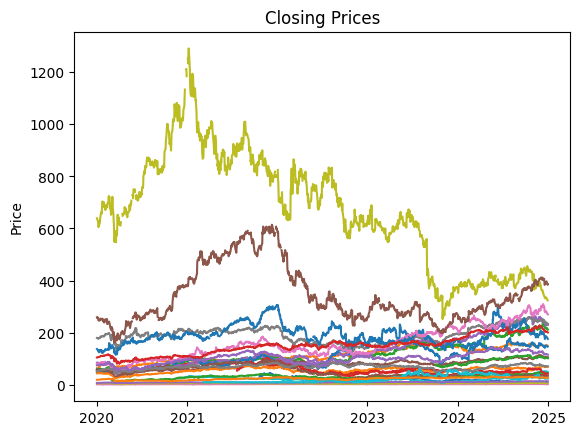

In [669]:
# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 295
Number of rows total: 1293
Number of rows in dataframe without missing values after dropping bad columns: 754
Number of rows total after dropping bad columns: 1293


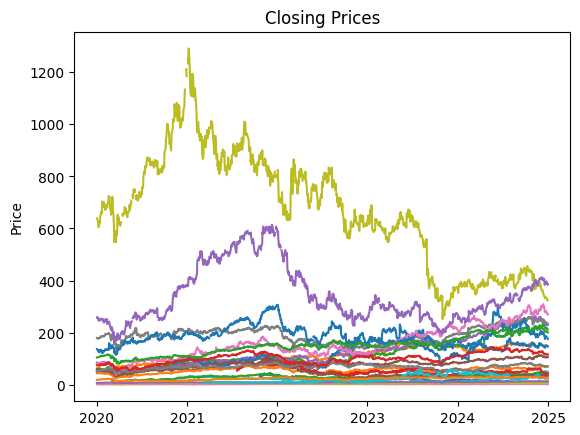

In [670]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

# Drop columns with more than 50% NaN values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values after dropping bad columns: {df.dropna().shape[0]}")
print(f"Number of rows total after dropping bad columns: {df.shape[0]}")

# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

Number of rows in dataframe without missing values: 754
Number of rows total: 1293


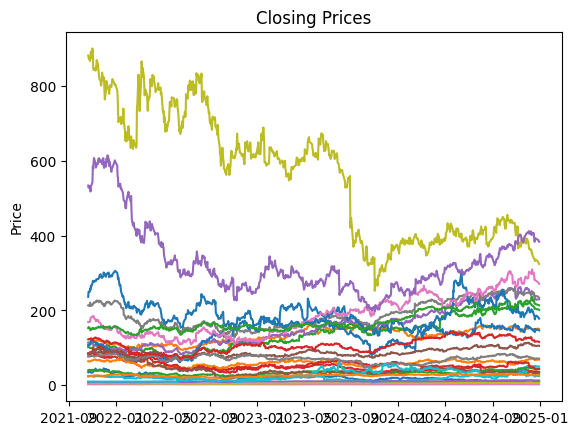

In [671]:
# Number of rows in dataframe without missing values
print(f"Number of rows in dataframe without missing values: {df.dropna().shape[0]}")
print(f"Number of rows total: {df.shape[0]}")

df = df.dropna()

# Plot closing prices
plt.plot(df['Close'])
# plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()


In [672]:
df_normalized_closed = df['Close'] - df['Close'].iloc[0]
df_normalized_closed

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,KGX.DE,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-10-22,2.044998,1.125366,-0.048744,-0.909744,0.839996,1.730003,-0.009361,-0.816330,-0.036531,-0.189026,...,0.378883,-0.360001,0.557358,-6.360840,0.000000,13.903793,0.449440,2.403778,0.661537,-5.690002
2021-10-25,1.505001,0.562691,-0.672523,0.273911,0.339996,1.400002,0.009361,-0.710709,-0.088947,-0.397947,...,-0.322060,1.080002,0.438560,-13.492737,0.000000,13.419342,0.220314,-0.690887,0.939598,-1.149963
2021-10-26,2.264999,0.937813,-1.179321,0.948875,-0.389999,1.520004,0.028082,7.664001,-0.022236,0.567074,...,4.811867,0.899994,1.516708,-14.649170,0.080000,21.461288,0.352503,-2.460602,-0.258873,-8.200012
2021-10-27,1.105000,0.375130,-2.982437,-0.753227,-2.310005,1.020004,-0.074886,-1.152435,0.034150,0.666561,...,2.690094,10.529999,1.096413,-3.469543,0.040000,18.070084,0.193876,-6.369156,-0.067123,-15.769958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-23.885000,37.175491,116.222572,-47.997112,119.660004,23.510002,-0.026999,21.424927,0.900082,26.023684,...,-52.581440,113.540009,-7.375320,-549.359467,13.140001,-94.364548,2.172585,51.570557,-6.721336,-148.239990
2024-12-20,-23.735001,37.675491,115.483772,-48.296391,116.589996,24.090004,-0.017108,24.177795,0.904932,26.723684,...,-52.401440,111.260010,-5.490845,-548.859467,14.090000,-85.564545,2.142584,51.869446,-6.013535,-140.569977
2024-12-23,-23.575001,40.675491,114.635155,-47.917305,114.669998,22.930000,0.012564,24.975739,0.898141,27.143682,...,-52.121441,109.820007,-4.677544,-546.759460,15.630001,-88.264542,2.072584,49.846954,-5.644676,-142.959991


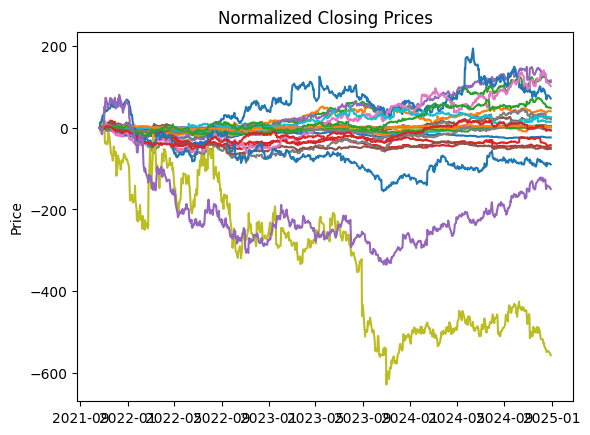

In [673]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
# plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [674]:
# Add a new column to the DataFrame with daily differences
df_diff = df['Close'].diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,KGX.DE,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-22,2.044998,1.125366,-0.048744,-0.909744,0.839996,1.730003,-0.009361,-0.816330,-0.036531,-0.189026,...,0.378883,-0.360001,0.557358,-6.360840,0.000000,13.903793,0.449440,2.403778,0.661537,-5.690002
2021-10-25,-0.539997,-0.562675,-0.623779,1.183655,-0.500000,-0.330002,0.018722,0.105621,-0.052415,-0.208921,...,-0.700943,1.440002,-0.118797,-7.131897,0.000000,-0.484451,-0.229126,-3.094666,0.278061,4.540039
2021-10-26,0.759998,0.375122,-0.506798,0.674965,-0.729996,0.120003,0.018721,8.374710,0.066710,0.965021,...,5.133926,-0.180008,1.078148,-1.156433,0.080000,8.041946,0.132189,-1.769714,-1.198471,-7.050049
2021-10-27,-1.160000,-0.562683,-1.803116,-1.702103,-1.920006,-0.500000,-0.102968,-8.816437,0.056386,0.099487,...,-2.121773,9.630005,-0.420296,11.179626,-0.040000,-3.391205,-0.158627,-3.908554,0.191750,-7.569946
2021-10-28,-1.090000,1.312943,0.575050,1.672768,0.740005,0.239998,-0.056164,-0.096100,0.042885,0.457638,...,2.254387,1.589996,1.288300,13.492737,0.010000,11.529999,0.493504,2.223969,3.077705,14.219971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.639999,-0.500000,-0.988373,0.458893,-1.449997,-0.559998,-0.059344,-2.124512,-0.111545,-1.220001,...,-0.910000,0.910004,-0.743874,-6.500000,-0.929998,-6.600006,-0.190001,0.099640,-0.488480,1.899994
2024-12-20,0.150000,0.500000,-0.738800,-0.299278,-3.070007,0.580002,0.009891,2.752869,0.004850,0.700001,...,0.180000,-2.279999,1.884476,0.500000,0.949999,8.800003,-0.030001,0.298889,0.707802,7.670013
2024-12-23,0.160000,3.000000,-0.848618,0.379086,-1.919998,-1.160004,0.029672,0.797943,-0.006790,0.419998,...,0.279999,-1.440002,0.813301,2.100006,1.540001,-2.699997,-0.070000,-2.022491,0.368858,-2.390015


In [675]:
# Add a new column to the DataFrame with daily difference relative to the previous day
df_diff_relative = df['Close'].pct_change()
# Drop the first row (NaN)
df_diff_relative = df_diff_relative.dropna()
df_diff_relative


Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,KGX.DE,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-22,0.058874,0.010256,-0.000478,-0.010833,0.007372,0.021129,-0.003509,-0.003824,-0.006413,-0.007884,...,0.004532,-0.002130,0.007279,-0.007216,0.000000,0.058824,0.018227,0.015690,0.005387,-0.010663
2021-10-25,-0.014682,-0.005076,-0.006126,0.014249,-0.004356,-0.003947,0.007042,0.000497,-0.009261,-0.008783,...,-0.008347,0.008539,-0.001540,-0.008150,0.000000,-0.001936,-0.009126,-0.019888,0.002252,0.008600
2021-10-26,0.020971,0.003401,-0.005007,0.008011,-0.006388,0.001441,0.006993,0.039357,0.011896,0.040928,...,0.061647,-0.001058,0.013999,-0.001332,0.008081,0.032196,0.005314,-0.011604,-0.009686,-0.013241
2021-10-27,-0.031351,-0.005085,-0.017906,-0.020041,-0.016909,-0.005995,-0.038195,-0.039864,0.009937,0.004054,...,-0.023998,0.056680,-0.005382,0.012897,-0.004008,-0.013153,-0.006343,-0.025929,0.001565,-0.014408
2021-10-28,-0.030413,0.011925,0.005815,0.020099,0.006629,0.002895,-0.021661,-0.000453,0.007483,0.018571,...,0.026125,0.008856,0.016587,0.015368,0.001006,0.045316,0.019858,0.015146,0.025078,0.027460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,-0.055701,-0.003392,-0.004511,0.012918,-0.006169,-0.005285,-0.021978,-0.008962,-0.016628,-0.023819,...,-0.028500,0.003231,-0.010635,-0.019197,-0.038798,-0.044415,-0.007032,0.000487,-0.004191,0.004955
2024-12-20,0.013825,0.003404,-0.003387,-0.008317,-0.013142,0.005503,0.003745,0.011718,0.000735,0.014000,...,0.005803,-0.008070,0.027232,0.001506,0.041233,0.061972,-0.001118,0.001460,0.006098,0.019903
2024-12-23,0.014545,0.020353,-0.003904,0.010623,-0.008329,-0.010947,0.011194,0.003357,-0.001029,0.008284,...,0.008974,-0.005138,0.011441,0.006314,0.064193,-0.017904,-0.002612,-0.009862,0.003159,-0.006081


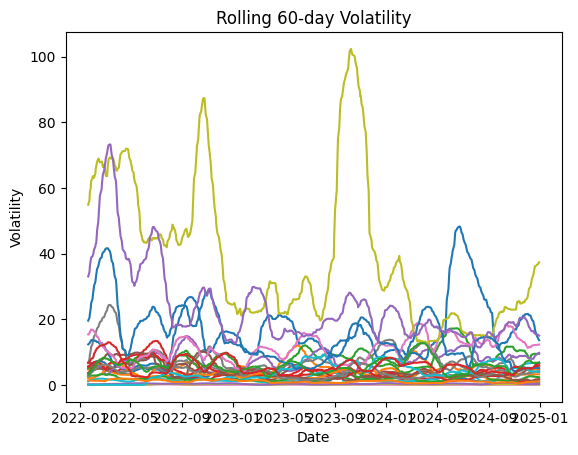

In [676]:
df_volatility = df['Close'].rolling(window=60).std()
df_volatility

# Plot volatility
plt.plot(df_volatility)
plt.title('Rolling 60-day Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

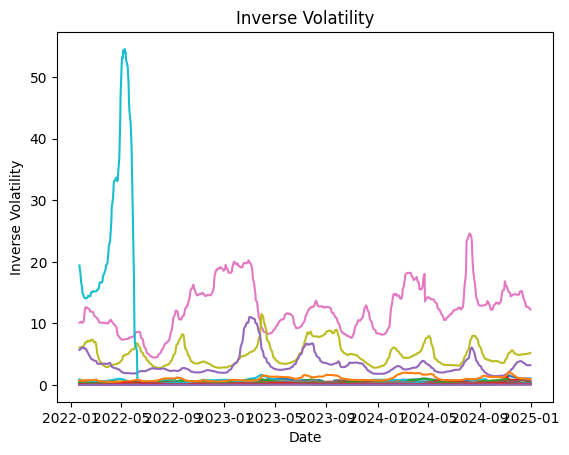

In [677]:
df_inverse_volatility = 1 / df_volatility
df_inverse_volatility

# Plot inverse volatility
plt.plot(df_inverse_volatility)
plt.title('Inverse Volatility')
plt.ylabel('Inverse Volatility')
plt.xlabel('Date')
plt.show()

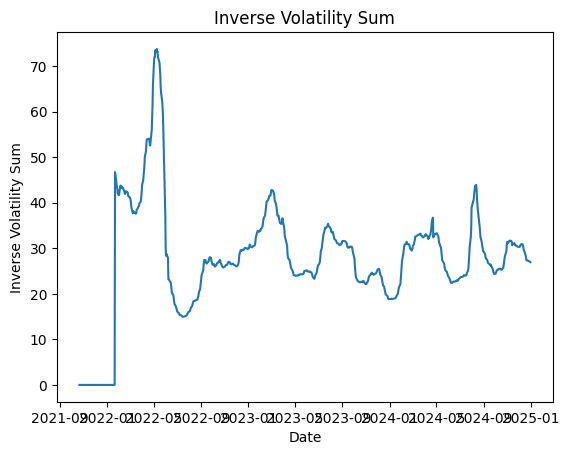

In [678]:
df_inverse_volatility_sum = df_inverse_volatility.sum(axis=1)
df_inverse_volatility_sum

# Plot inverse volatility sum
plt.plot(df_inverse_volatility_sum)
plt.title('Inverse Volatility Sum')
plt.ylabel('Inverse Volatility Sum')
plt.xlabel('Date')
plt.show()

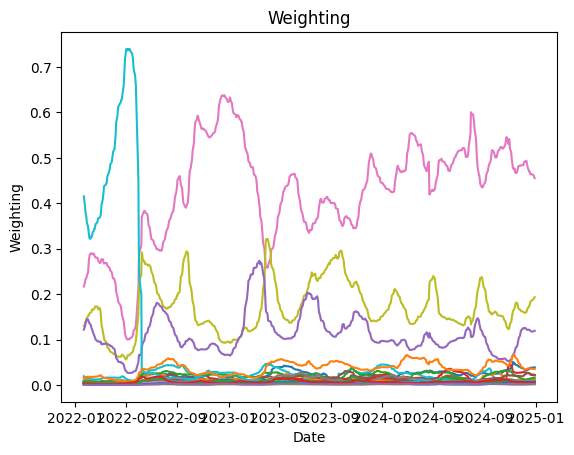

In [679]:
df_weighting = df_inverse_volatility.div(df_inverse_volatility_sum, axis=0)
df_weighting
# Plot weighting
plt.plot(df_weighting)
plt.title('Weighting')
plt.ylabel('Weighting')
plt.xlabel('Date')
plt.show()


In [680]:
df_weighting

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,KGX.DE,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.037373,0.011164,0.003800,0.023547,0.004198,0.007260,0.465730,0.006794,0.180838,0.005330,...,0.024722,0.002965,0.009041,0.001016,0.008838,0.006796,0.036473,0.005365,0.006427,0.002290
2024-12-20,0.038104,0.011176,0.003854,0.022801,0.004101,0.007486,0.463561,0.006705,0.183980,0.005410,...,0.023807,0.003002,0.009070,0.001013,0.008917,0.007016,0.036280,0.005463,0.006400,0.002336
2024-12-23,0.038202,0.011229,0.003864,0.022124,0.003976,0.007637,0.464328,0.006573,0.186134,0.005440,...,0.023315,0.003005,0.009114,0.001007,0.008937,0.007051,0.035811,0.005452,0.006338,0.002367


In [681]:
# Drop rows before 2023-01-01
df_weighting = df_weighting.loc['2023-01-01':]
df_weighting

Ticker,AUTO.OL,BKW.SW,BMI,CGNX,CLH,CWST,CWY.AX,ECL,ENEL.MI,ENR.DE,...,KGX.DE,MANH,NEE,ORSTED.CO,SYM,TOM.OL,VIE.PA,WM,XYL,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.017854,0.007172,0.004313,0.012125,0.010258,0.009131,0.625514,0.006574,0.094726,0.013130,...,0.011350,0.005434,0.007397,0.001348,0.027486,0.002663,0.020985,0.008284,0.003898,0.002550
2023-01-04,0.018092,0.006740,0.004319,0.011854,0.009958,0.009045,0.633321,0.006411,0.092589,0.012753,...,0.010981,0.005772,0.007204,0.001300,0.026885,0.002598,0.020690,0.008067,0.003886,0.002557
2023-01-05,0.018449,0.006668,0.004487,0.012044,0.009709,0.009415,0.630832,0.006423,0.093087,0.012779,...,0.010734,0.006003,0.007236,0.001323,0.026817,0.002590,0.021143,0.008024,0.004013,0.002566
2023-01-06,0.018419,0.006466,0.004733,0.012282,0.009813,0.010075,0.625597,0.006529,0.093679,0.012882,...,0.010610,0.006276,0.007338,0.001369,0.027269,0.002631,0.021654,0.008213,0.004200,0.002557
2023-01-09,0.017627,0.006316,0.005034,0.012364,0.009933,0.010651,0.619542,0.006589,0.095207,0.013043,...,0.010327,0.006450,0.007442,0.001432,0.027326,0.002685,0.022438,0.008345,0.004401,0.002524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,0.037373,0.011164,0.003800,0.023547,0.004198,0.007260,0.465730,0.006794,0.180838,0.005330,...,0.024722,0.002965,0.009041,0.001016,0.008838,0.006796,0.036473,0.005365,0.006427,0.002290
2024-12-20,0.038104,0.011176,0.003854,0.022801,0.004101,0.007486,0.463561,0.006705,0.183980,0.005410,...,0.023807,0.003002,0.009070,0.001013,0.008917,0.007016,0.036280,0.005463,0.006400,0.002336
2024-12-23,0.038202,0.011229,0.003864,0.022124,0.003976,0.007637,0.464328,0.006573,0.186134,0.005440,...,0.023315,0.003005,0.009114,0.001007,0.008937,0.007051,0.035811,0.005452,0.006338,0.002367


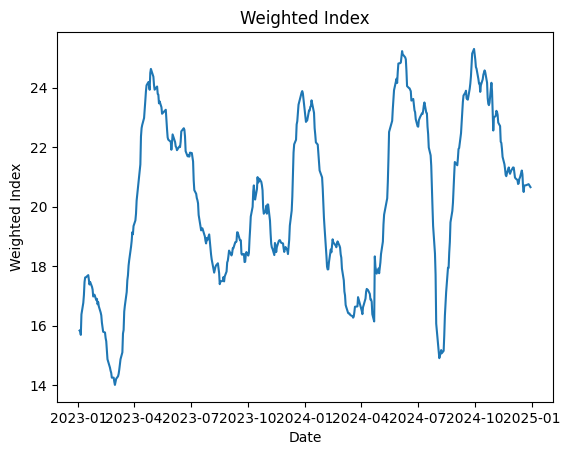

In [682]:
# Create a index with help of the closing prices and the weighting
df_weighted_index = (df.loc['2023-01-01':]['Close'] * df_weighting).sum(axis=1)
df_weighted_index

# Plot weighted index
plt.plot(df_weighted_index)
plt.title('Weighted Index')
plt.ylabel('Weighted Index')
plt.xlabel('Date')
plt.show()

[*********************100%***********************]  1 of 1 completed


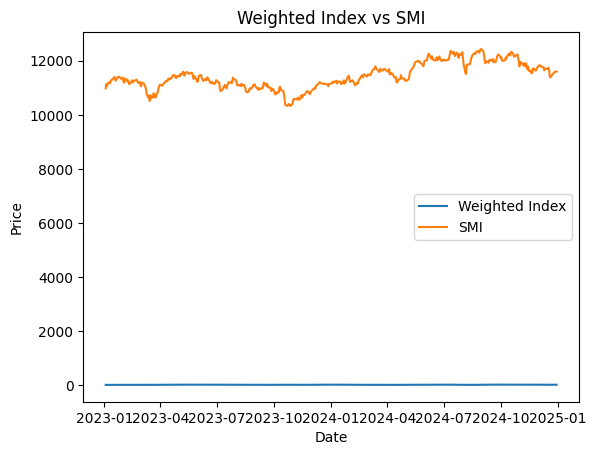

In [683]:
# Compare the weighted index with SMI
smi = yf.download('^SSMI', start='2023-01-01', end='2025-01-01', interval='1d')['Close']
smi = smi.reindex(df_weighted_index.index, method='ffill')
smi = smi.dropna()

# Plot weighted index and SMI
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()



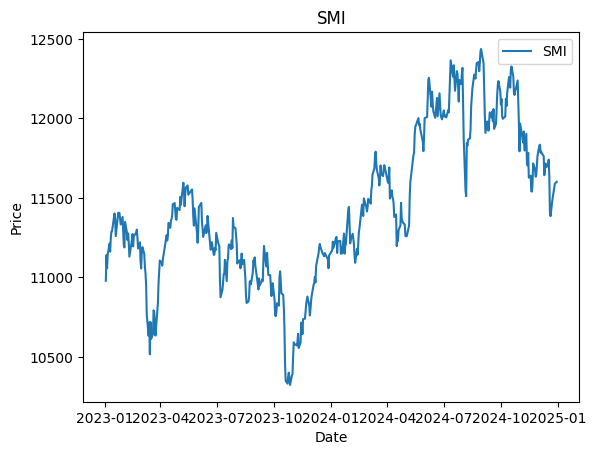

In [684]:
# Plot SMI 
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [685]:
smi = (smi / smi.iloc[0])  # Normalize to start at 0
df_weighted_index = (df_weighted_index / df_weighted_index.iloc[0])  # Normalize to start at 0
df_weighted_index

Date
2023-01-03    1.000000
2023-01-04    0.998493
2023-01-05    0.990960
2023-01-06    1.034213
2023-01-09    1.058817
                ...   
2024-12-19    1.293919
2024-12-20    1.307495
2024-12-23    1.308236
2024-12-27    1.310452
2024-12-30    1.304093
Length: 471, dtype: float64

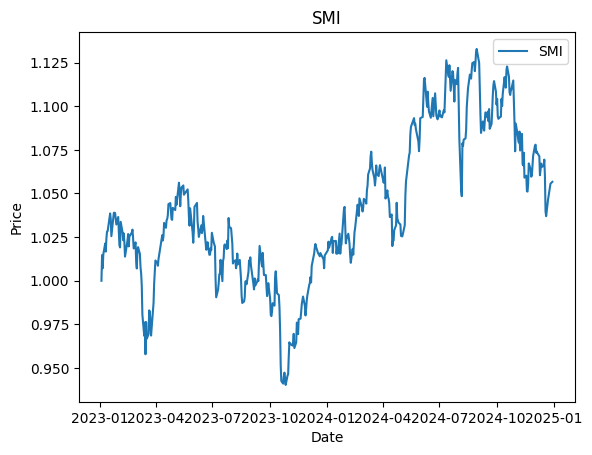

In [686]:
# Plot weighted index and S&P 500  
plt.plot(smi, label='SMI')
plt.title('SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

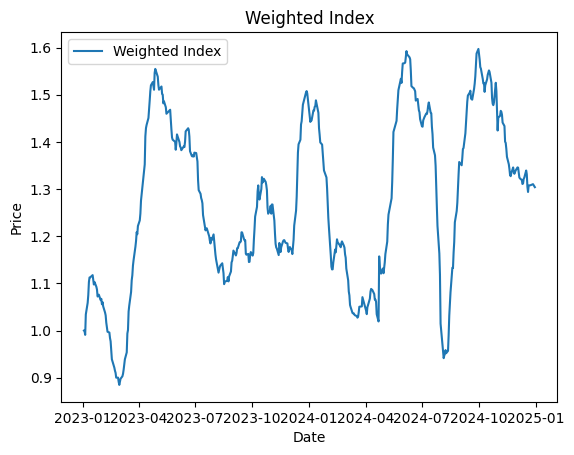

In [687]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.title('Weighted Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

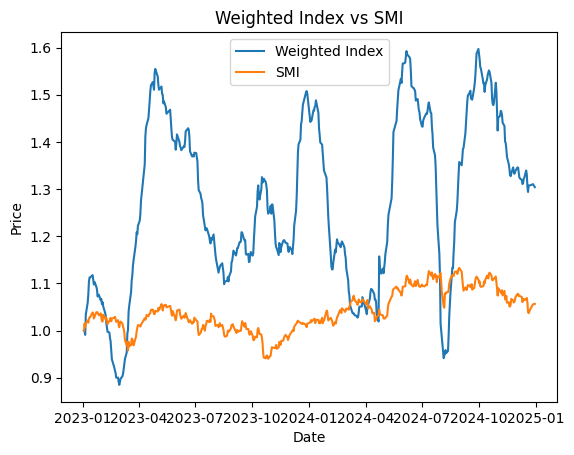

In [688]:
# Plot weighted index and S&P 500  
plt.plot(df_weighted_index, label='Weighted Index')
plt.plot(smi, label='SMI')
plt.title('Weighted Index vs SMI')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()